
# Resrouce Library 

## Resource file name: USCS_OverviewMap

### Topic: Death Rates by State

#### Source: United States Cancer Statistics: Data Visualizations
https://gis.cdc.gov/Cancer/USCS/DataViz.html

All Types of Cancer, All Ages, All Races/Ethnicities, Male and Female
Rate per 100,000 people

In [1]:
import censusdata
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy import stats

In [2]:
# Specify path to read file
path = os.path.join("Resources", "USCS_OverviewMap.csv") #import from United States Cancer Statistics: Data Visualizations by State

# Read in pandas
df = pd.read_csv(path)  

In [3]:
# Download ACS 2013-2017 5-year estimates on population size, median age, and median household income,etc
data = censusdata.download('acs5', 2017, censusdata.censusgeo([('state', '*')]), ['B01001_001E', 'B01002_001E', 'B19013_001E','B12006_006E','B12006_011E','B17005_006E', "B17005_011E", "C27016_041E", "B19215_005E", "B19215_008E", "B09019_027E", "B09019_030E","B992701_003E","B17001_002E"])

data_table = data.rename(columns={"B01001_001E": "population size", "B01002_001E": "median age",
                                  "B19013_001E" : "median household income", "B12006_006E" : "NeverMarried Unemployed Male", 
                                  "B12006_011E" : "NeverMarried Unemployed Female", "B17005_006E" : "Unemployed Male below line", 
                                  "B17005_011E" : "Unemployed Female below line", "C27016_041E" : "4.00 of poverty threshold 65 years and over No health insurance coverage",
                                  "B19215_005E" : "MEDIAN HOUSEHOLD INCOME Living Alone 65 and over", "B19215_008E" : "MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over",
                                  "B09019_027E" : "Male Living alone", "B09019_030E" : "Female Living alone",
                                  "B992701_003E" : "Total No health insurance", "B17001_002E": "Poverty Count"})

In [4]:
# convert feilds to match for state
data_table.index = data_table.index.astype(str)
data_table["Area"] = data_table.index.str.split(':').str[0]


In [5]:
# Merge with census  & death rate data
deathrates_census = pd.merge(df, data_table, on="Area")

In [6]:
# Create new coloumns to divide count by population (matching apples to apples)
deathrates_census["Never Married Percentage"] = (deathrates_census["NeverMarried Unemployed Male"] +deathrates_census["NeverMarried Unemployed Female"]) / deathrates_census["population size"]
deathrates_census["Unemployed Below Line"] = (deathrates_census["Unemployed Male below line"] +deathrates_census["Unemployed Female below line"]) / deathrates_census["population size"]
deathrates_census["No Insurance"] = (deathrates_census["Total No health insurance"] ) / deathrates_census["population size"]
deathrates_census["Living Alone Percentage"] = (deathrates_census["Male Living alone"] +deathrates_census["Female Living alone"]) / deathrates_census["population size"]
deathrates_census["Poverty"] = (deathrates_census["Poverty Count"] ) / deathrates_census["population size"]

In [7]:
# Export file for output
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
deathrates_census.to_csv('out.zip', index=False,
          compression=compression_opts)  

The correlation between age rate and median household income age is -0.63
*Death count was adjusted for differences in age distributions


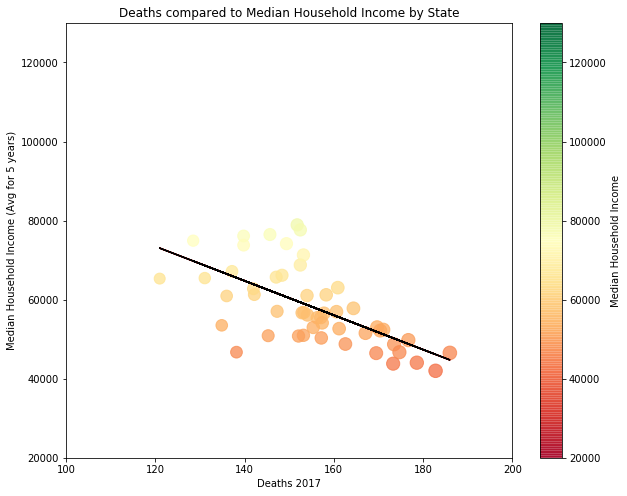

In [24]:
# Compare Deaths to median income
x_axis = deathrates_census.loc[:,"AgeAdjustedRate"]
y_axis = deathrates_census.loc[:,'median household income']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Print Pearson's correlation coefficient (rvalue)
# print(rvalue)

r_value = print(f"The correlation between age rate and median household income age is {round(rvalue,2)}")
print(f"*Death count was adjusted for differences in age distributions")

# Create Plot
plt.figure(figsize=(10,8))
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'RdYlGn', s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.ylim(20000, 130000)
plt.clim(20000, 130000)
plt.xlim(100, 200)
plt.title('Deaths compared to Median Household Income by State')
plt.xlabel('Deaths 2017')
plt.ylabel('Median Household Income (Avg for 5 years)')
plt.plot(x_axis,regress_values,"k-")
plt.annotate(r_value,(20,15),fontsize=15,color="red")
cbar = plt.colorbar()
cbar.set_label('Median Household Income')
plt.show()

The correlation between age rate and no insurance is 0.24
*Death count was adjusted for differences in age distributions


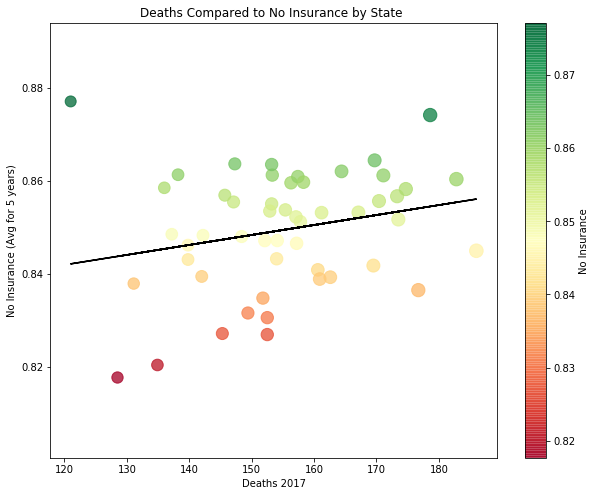

In [29]:
# Compare Deaths to No Insurance
x_axis = deathrates_census.loc[:,"AgeAdjustedRate"]
y_axis = deathrates_census.loc[:,'No Insurance']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Print Pearson's correlation coefficient (rvalue)
# print(rvalue)

r_value = print(f"The correlation between age rate and no insurance is {round(rvalue,2)}")
print(f"*Death count was adjusted for differences in age distributions")

# Create Plot
plt.figure(figsize=(10,8))
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'RdYlGn', s=x_axis, alpha=0.75)
plt.title('Deaths Compared to No Insurance by State ')
plt.xlabel('Deaths 2017')
plt.ylabel('No Insurance (Avg for 5 years)')
plt.plot(x_axis,regress_values,"k-")
# plt.ylim(.3, 1)
cbar = plt.colorbar()
cbar.set_label('No Insurance')
plt.show()

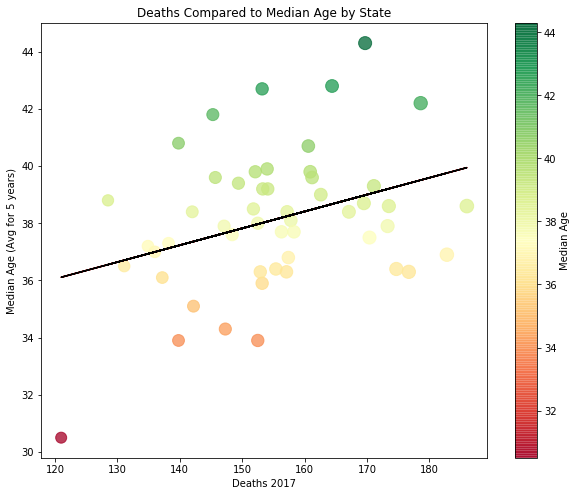

The correlation between age rate and median age is 0.34


In [26]:
# Compare Deaths to median age
x_axis = deathrates_census.loc[:,"AgeAdjustedRate"]
y_axis = deathrates_census.loc[:,'median age']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Print Pearson's correlation coefficient (rvalue)
# print(rvalue)

# Create Plot
plt.figure(figsize=(10,8))
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'RdYlGn', s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

plt.title('Deaths Compared to Median Age by State')
plt.xlabel('Deaths 2017')
plt.ylabel('Median Age (Avg for 5 years)')
plt.plot(x_axis,regress_values,"k-")
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")
cbar = plt.colorbar()
cbar.set_label('Median Age')
plt.show()

print(f"The correlation between age rate and median age is {round(rvalue,2)}")

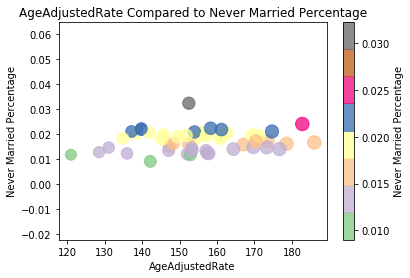

In [10]:
# Compare Deaths to Never Married Percentage
x_axis = deathrates_census.loc[:,"AgeAdjustedRate"]
y_axis = deathrates_census.loc[:,'Never Married Percentage']
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'Accent', s=x_axis, alpha=0.75)
plt.title('AgeAdjustedRate Compared to Never Married Percentage')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('Never Married Percentage')
cbar = plt.colorbar()
cbar.set_label('Never Married Percentage')
plt.show()

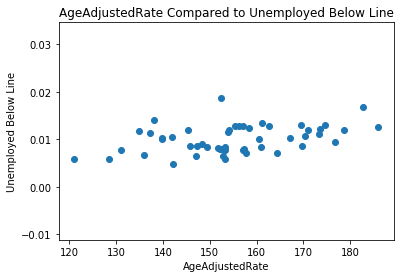

In [11]:
# Compare Deaths to Unemployed Male below line
plt.scatter(deathrates_census.loc[:,"AgeAdjustedRate"],deathrates_census.loc[:,'Unemployed Below Line'])
plt.title('AgeAdjustedRate Compared to Unemployed Below Line')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('Unemployed Below Line')
plt.show()

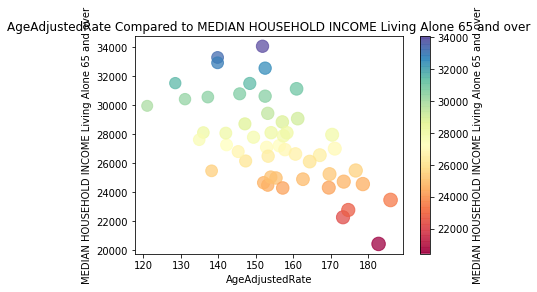

In [13]:
# Compare Deaths to MEDIAN HOUSEHOLD INCOME Living Alone 65 and over
x_axis = deathrates_census.loc[:,"AgeAdjustedRate"]
y_axis = deathrates_census.loc[:,'MEDIAN HOUSEHOLD INCOME Living Alone 65 and over']
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'Spectral', s=x_axis, alpha=0.75)
plt.title('AgeAdjustedRate Compared to MEDIAN HOUSEHOLD INCOME Living Alone 65 and over')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('MEDIAN HOUSEHOLD INCOME Living Alone 65 and over')
cbar = plt.colorbar()
cbar.set_label('MEDIAN HOUSEHOLD INCOME Living Alone 65 and over')
plt.show()

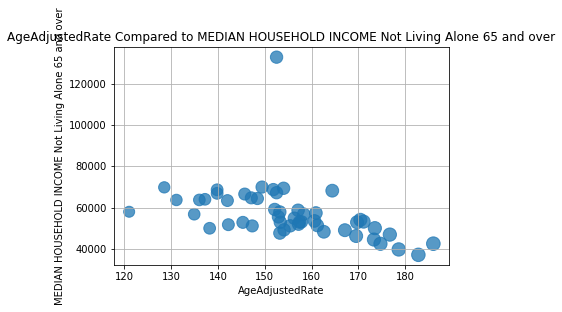

In [14]:
# Compare Deaths to MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over
x_axis = deathrates_census.loc[:,"AgeAdjustedRate"]
plt.scatter(x_axis, deathrates_census.loc[:,'MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over'], s=x_axis, alpha=0.75)
plt.title('AgeAdjustedRate Compared to MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over')
plt.grid(True)
plt.show()

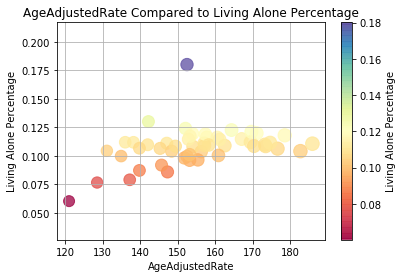

In [15]:
# Compare Deaths to Living Alone Percentage
x_axis = deathrates_census.loc[:,"AgeAdjustedRate"]
y_axis = deathrates_census.loc[:,'Living Alone Percentage']
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'Spectral', s=x_axis, alpha=0.75)
plt.title('AgeAdjustedRate Compared to Living Alone Percentage')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('Living Alone Percentage')
plt.grid(True)
cbar = plt.colorbar()
cbar.set_label('Living Alone Percentage')
plt.show()

In [16]:
# Plot out all corrilations
corr=deathrates_census.corr()
corr.style.background_gradient(cmap='coolwarm', axis=0)

C:\Users\tawnyn\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\tawnyn\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax
C:\Users\tawnyn\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Year,AgeAdjustedRate,DeathCount,Population,population size,median age,median household income,NeverMarried Unemployed Male,NeverMarried Unemployed Female,Unemployed Male below line,Unemployed Female below line,4.00 of poverty threshold 65 years and over No health insurance coverage,MEDIAN HOUSEHOLD INCOME Living Alone 65 and over,MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over,Male Living alone,Female Living alone,Total No health insurance,Poverty Count,Never Married Percentage,Unemployed Below Line,No Insurance,Living Alone Percentage,Poverty
Year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AgeAdjustedRate,nan,1.000000,-0.081542,-0.165236,-0.162742,0.344996,-0.630797,-0.159979,-0.141539,-0.112229,-0.092088,-0.251700,-0.623134,-0.426152,-0.111591,-0.108130,-0.159867,-0.115021,0.133990,0.414977,0.240309,0.372027,0.506940
DeathCount,nan,-0.081542,1.000000,0.978443,0.978953,0.024416,-0.019548,0.967267,0.968931,0.974499,0.978272,0.900419,0.036734,-0.089500,0.991459,0.993367,0.977022,0.969707,0.256766,0.211458,-0.117975,-0.252608,0.189647
Population,nan,-0.165236,0.978443,1.000000,0.999821,-0.076459,0.044832,0.983878,0.982283,0.978653,0.980691,0.939062,0.083788,-0.046061,0.983914,0.976156,0.999685,0.992146,0.225659,0.157514,-0.081741,-0.316458,0.159633
population size,nan,-0.162742,0.978953,0.999821,1.000000,-0.073635,0.047465,0.986220,0.984611,0.979960,0.981450,0.935388,0.085499,-0.044848,0.984492,0.977544,0.999846,0.991496,0.229884,0.158763,-0.080588,-0.314170,0.158211
median age,nan,0.344996,0.024416,-0.076459,-0.073635,1.000000,-0.118617,-0.048034,-0.049387,-0.036552,-0.043567,-0.101595,-0.129453,-0.161298,-0.027261,0.005427,-0.078371,-0.091830,-0.018749,-0.018489,-0.020695,0.224662,-0.116519
median household income,nan,-0.630797,-0.019548,0.044832,0.047465,-0.118617,1.000000,0.065400,0.051080,-0.022893,-0.036790,0.105680,0.870347,0.736664,-0.004584,0.010815,0.045988,-0.043671,0.130892,-0.369365,-0.340005,-0.152738,-0.762259
NeverMarried Unemployed Male,nan,-0.159979,0.967267,0.983878,0.986220,-0.048034,0.065400,1.000000,0.998118,0.991533,0.985907,0.900193,0.101179,-0.021300,0.966448,0.965590,0.985231,0.975738,0.297819,0.207848,-0.092711,-0.291265,0.165960
NeverMarried Unemployed Female,nan,-0.141539,0.968931,0.982283,0.984611,-0.049387,0.051080,0.998118,1.000000,0.991719,0.991011,0.897691,0.082583,-0.026922,0.967662,0.968255,0.983729,0.976726,0.319706,0.233297,-0.092526,-0.285461,0.185721
Unemployed Male below line,nan,-0.112229,0.974499,0.978653,0.979960,-0.036552,-0.022893,0.991533,0.991719,1.000000,0.994904,0.893321,0.037325,-0.071258,0.969165,0.965867,0.978660,0.980419,0.300393,0.264266,-0.087821,-0.268268,0.236177


In [17]:
# create dataset for only those used in presentation
deathrates_census_summary = deathrates_census[['AgeAdjustedRate',"median age","median household income","Unemployed Below Line","No Insurance","Living Alone Percentage","Never Married Percentage","Poverty"]]

In [18]:
# Plot correlations for only those used in presentation
corr=deathrates_census_summary.corr()
corr.style.background_gradient(cmap='coolwarm', axis=0)

,AgeAdjustedRate,median age,median household income,Unemployed Below Line,No Insurance,Living Alone Percentage,Never Married Percentage,Poverty
AgeAdjustedRate,1.000000,0.344996,-0.630797,0.414977,0.240309,0.372027,0.133990,0.506940
median age,0.344996,1.000000,-0.118617,-0.018489,-0.020695,0.224662,-0.018749,-0.116519
median household income,-0.630797,-0.118617,1.000000,-0.369365,-0.340005,-0.152738,0.130892,-0.762259
Unemployed Below Line,0.414977,-0.018489,-0.369365,1.000000,-0.089579,0.345515,0.843999,0.784561
No Insurance,0.240309,-0.020695,-0.340005,-0.089579,1.000000,-0.078025,-0.253165,0.081897
Living Alone Percentage,0.372027,0.224662,-0.152738,0.345515,-0.078025,1.000000,0.256970,0.201736
Never Married Percentage,0.133990,-0.018749,0.130892,0.843999,-0.253165,0.256970,1.000000,0.403518
Poverty,0.506940,-0.116519,-0.762259,0.784561,0.081897,0.201736,0.403518,1.000000
